In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv('Mall_Customers.csv')
resamp_data = data.sample(n=2000, replace=True, ignore_index = True,random_state=42)

In [5]:
resamp_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1995,158,Female,30,78,78
1996,161,Female,56,79,35
1997,77,Female,45,54,53
1998,116,Female,19,65,50
1999,154,Female,38,78,76


In [6]:
resamp_data.CustomerID = [i for i in range(2000, 4000)]

In [7]:
resamp_data.CustomerID.head()

0    2000
1    2001
2    2002
3    2003
4    2004
Name: CustomerID, dtype: int64

In [8]:
resamp_data.CustomerID = resamp_data.CustomerID.apply(lambda x:str(x).replace('','-')[1:-1])

In [9]:
resamp_data = resamp_data.set_index('CustomerID')

In [10]:
resamp_data.to_csv('Customer_Segmentation_Data.csv')

In [11]:
df = pd.read_csv('Customer_Segmentation_Data.csv')

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,2-0-0-0,Male,67,62,59
1,2-0-0-1,Male,35,93,90
2,2-0-0-2,Male,48,60,49
3,2-0-0-3,Male,37,20,13
4,2-0-0-4,Female,66,63,50


In [13]:
summary = df.describe()
summary

,Age,Annual Income (k$),Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000
mean,39.021000,60.297500,50.229500
std,13.747074,26.170182,25.665447
min,18.000000,15.000000,1.000000
25%,29.000000,40.000000,35.000000
50%,36.000000,62.000000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [14]:
df.isna().sum(axis = 0) , df.isna().sum(axis = 1)

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1995    0
 1996    0
 1997    0
 1998    0
 1999    0
 Length: 2000, dtype: int64)

In [15]:
df.columns = [i.lower() for i in df.columns]
df.columns = [i.replace(' ', '_') for i in df.columns]
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

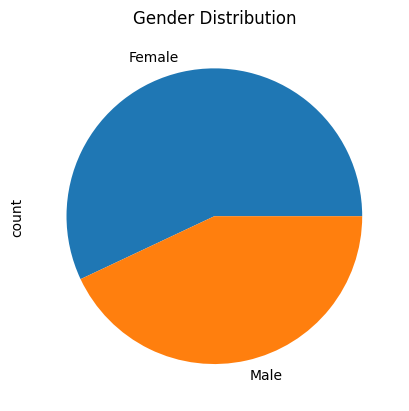

In [16]:
df.gender.value_counts().plot(kind='pie')
plt.title('Gender Distribution')
plt.show()

/var/folders/58/b3q3qsxs23j0hmhkxlt9jql80000gn/T/ipykernel_50208/1214928281.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
/var/folders/58/b3q3qsxs23j0hmhkxlt9jql80000gn/T/ipykernel_50208/1214928281.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
/v

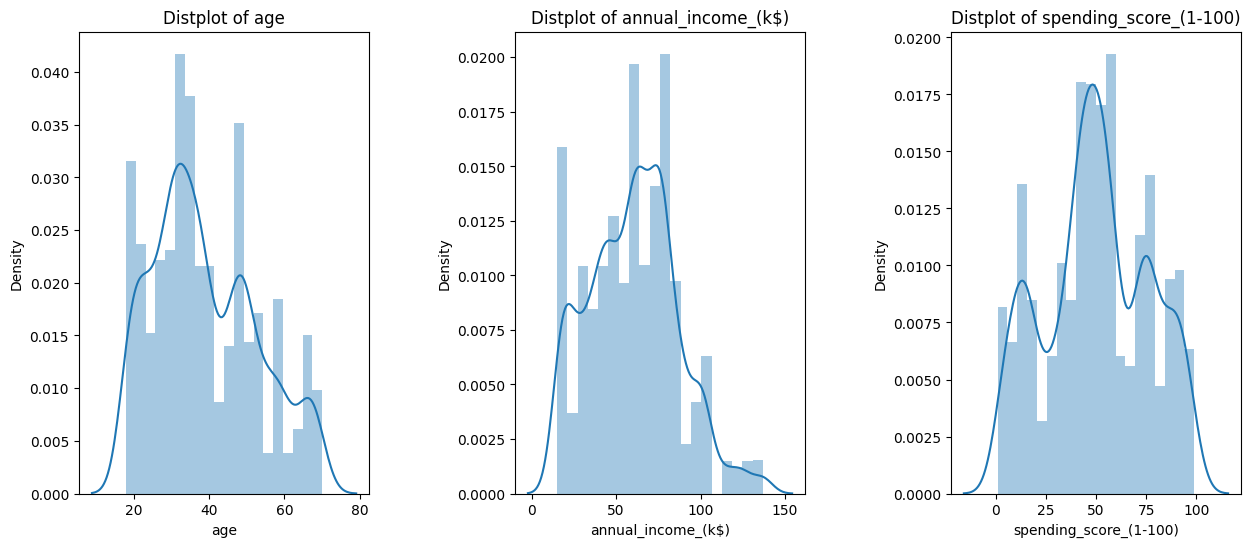

In [17]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age' , 'annual_income_(k$)' , 'spending_score_(1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()



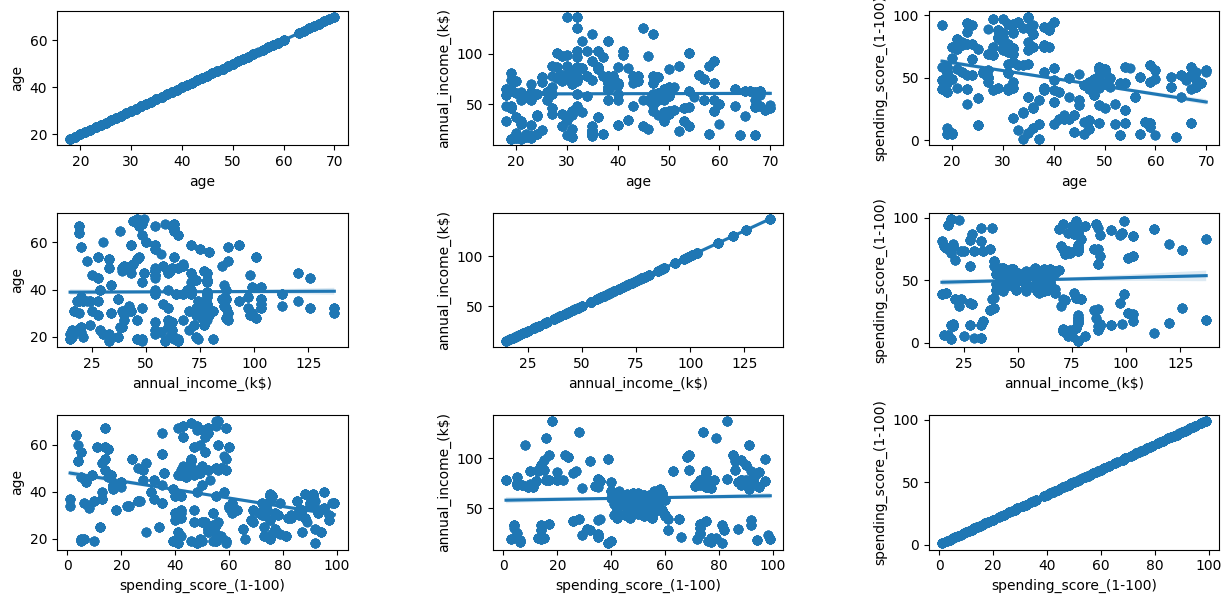

In [18]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['age' , 'annual_income_(k$)' , 'spending_score_(1-100)']:
    for y in ['age' , 'annual_income_(k$)' , 'spending_score_(1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

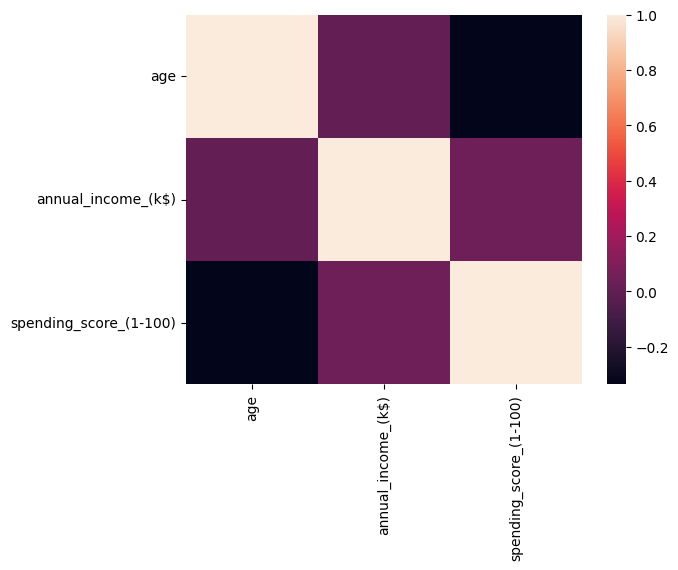

In [19]:
corr_mat = df[df.columns[2:]].corr()
sns.heatmap(corr_mat)
plt.show()

In [20]:
df

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,2-0-0-0,Male,67,62,59
1,2-0-0-1,Male,35,93,90
2,2-0-0-2,Male,48,60,49
3,2-0-0-3,Male,37,20,13
4,2-0-0-4,Female,66,63,50
...,...,...,...,...,...
1995,3-9-9-5,Female,30,78,78
1996,3-9-9-6,Female,56,79,35
1997,3-9-9-7,Female,45,54,53
1998,3-9-9-8,Female,19,65,50


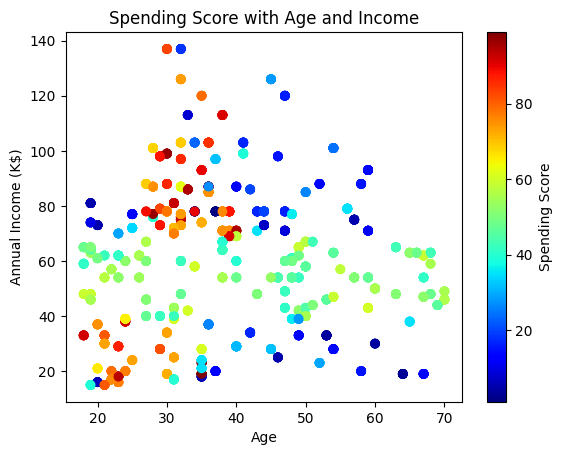

In [21]:
plt.scatter(df.age, df['annual_income_(k$)'], c = df['spending_score_(1-100)'],cmap='jet')
plt.colorbar().set_label('Spending Score')
plt.xlabel('Age')
plt.ylabel('Annual Income (K$)')
plt.title('Spending Score with Age and Income')
plt.show()

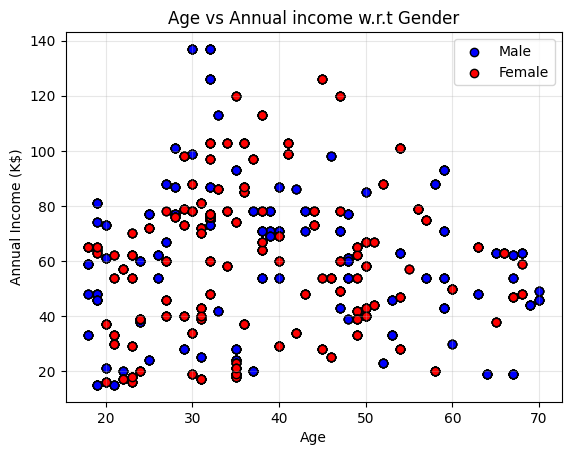

In [22]:
male = df[df.gender == 'Male']
female = df[df.gender == 'Female']

plt.scatter( male.age, male['annual_income_(k$)'], color = 'blue', label ='Male', edgecolor = 'black')
plt.scatter(female.age, female['annual_income_(k$)'], color = 'red', label = 'Female', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Annual Income (K$)')
plt.title('Age vs Annual income w.r.t Gender')
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

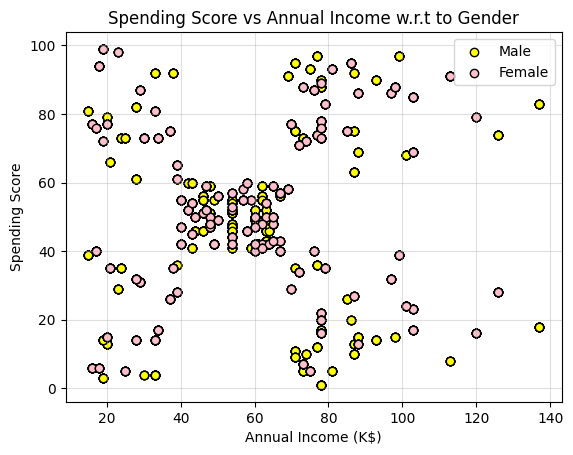

In [23]:
plt.scatter(male['annual_income_(k$)'], male['spending_score_(1-100)'], color = 'yellow',
           edgecolor = 'black', label = 'Male')
plt.scatter(female['annual_income_(k$)'], female['spending_score_(1-100)'], color = 'pink',
            edgecolor = 'black', label = 'Female')
plt.legend()
plt.grid(alpha = 0.4)
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score')
plt.title('Spending Score vs Annual Income w.r.t to Gender')
plt.show()

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

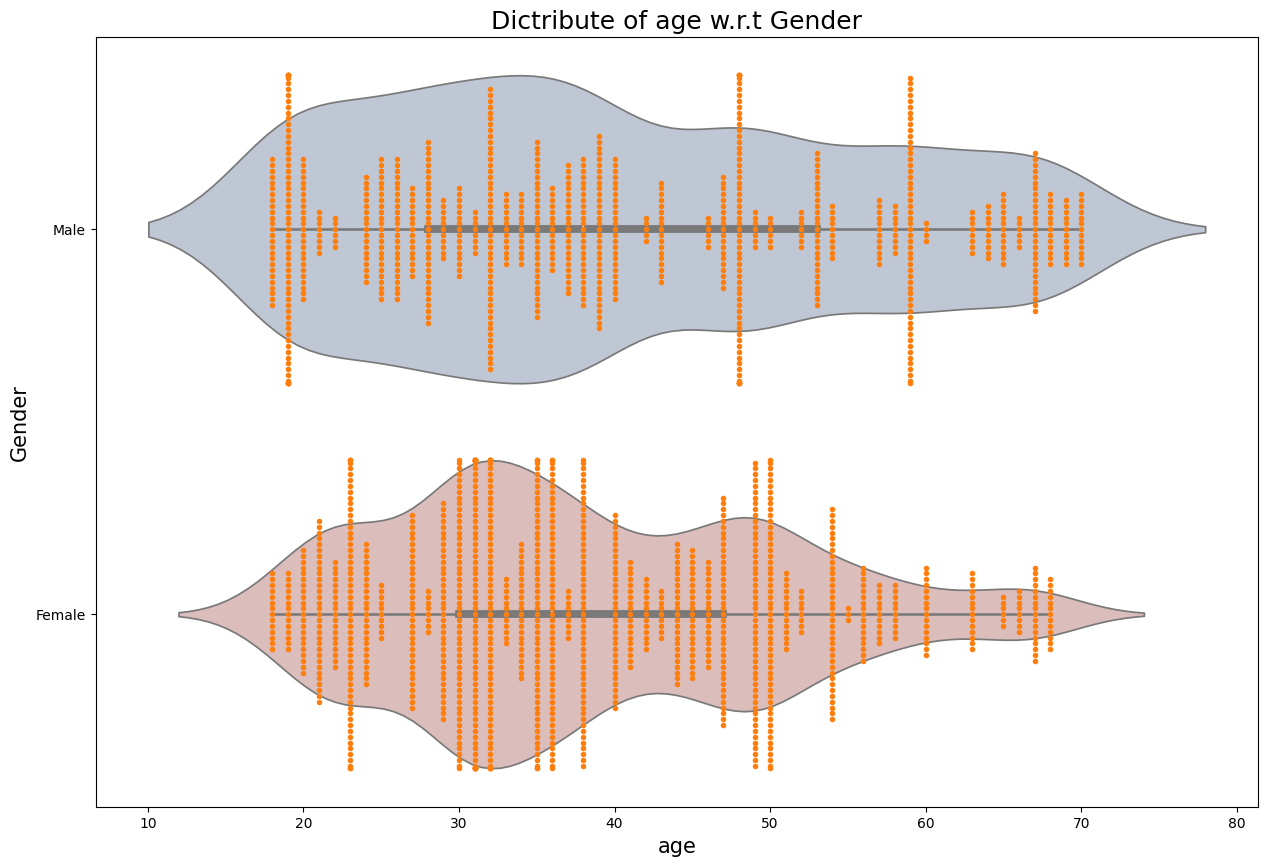

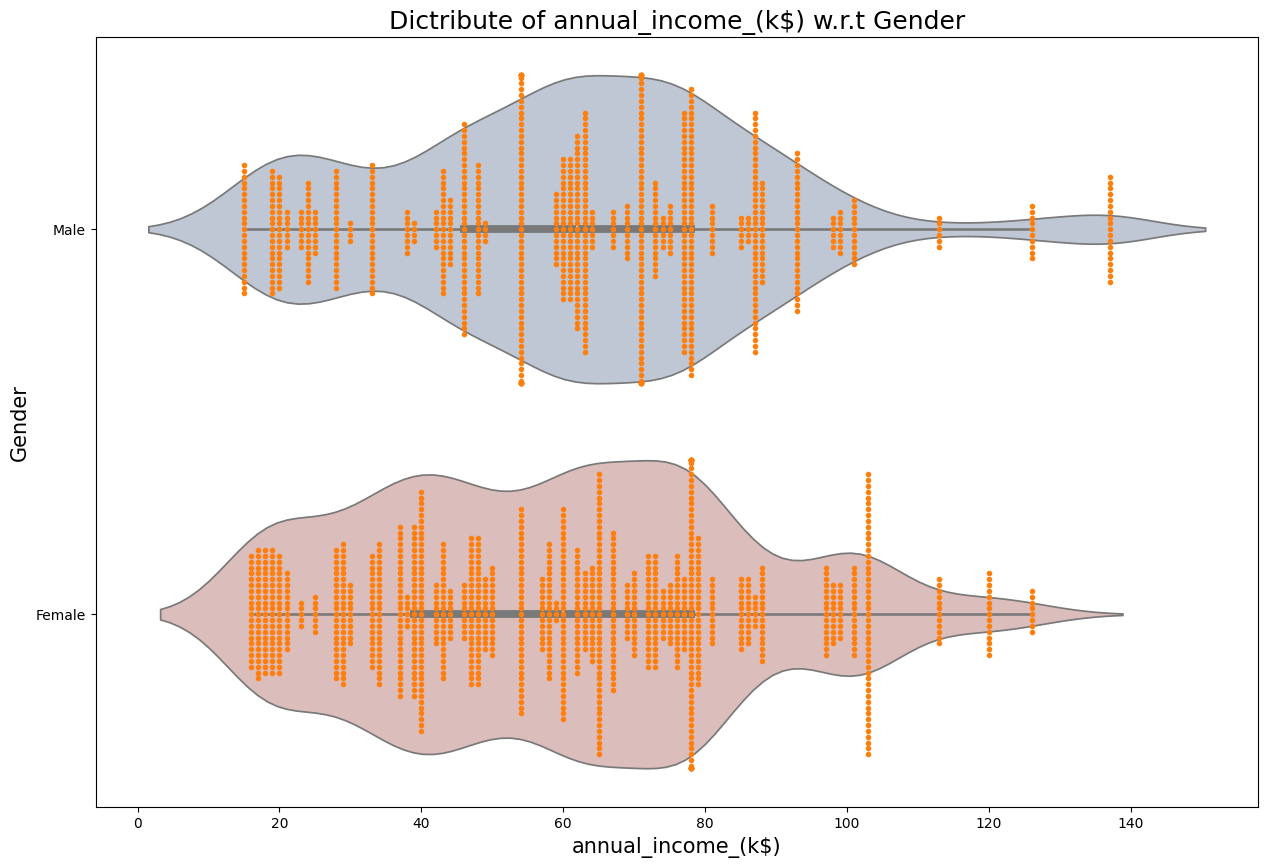

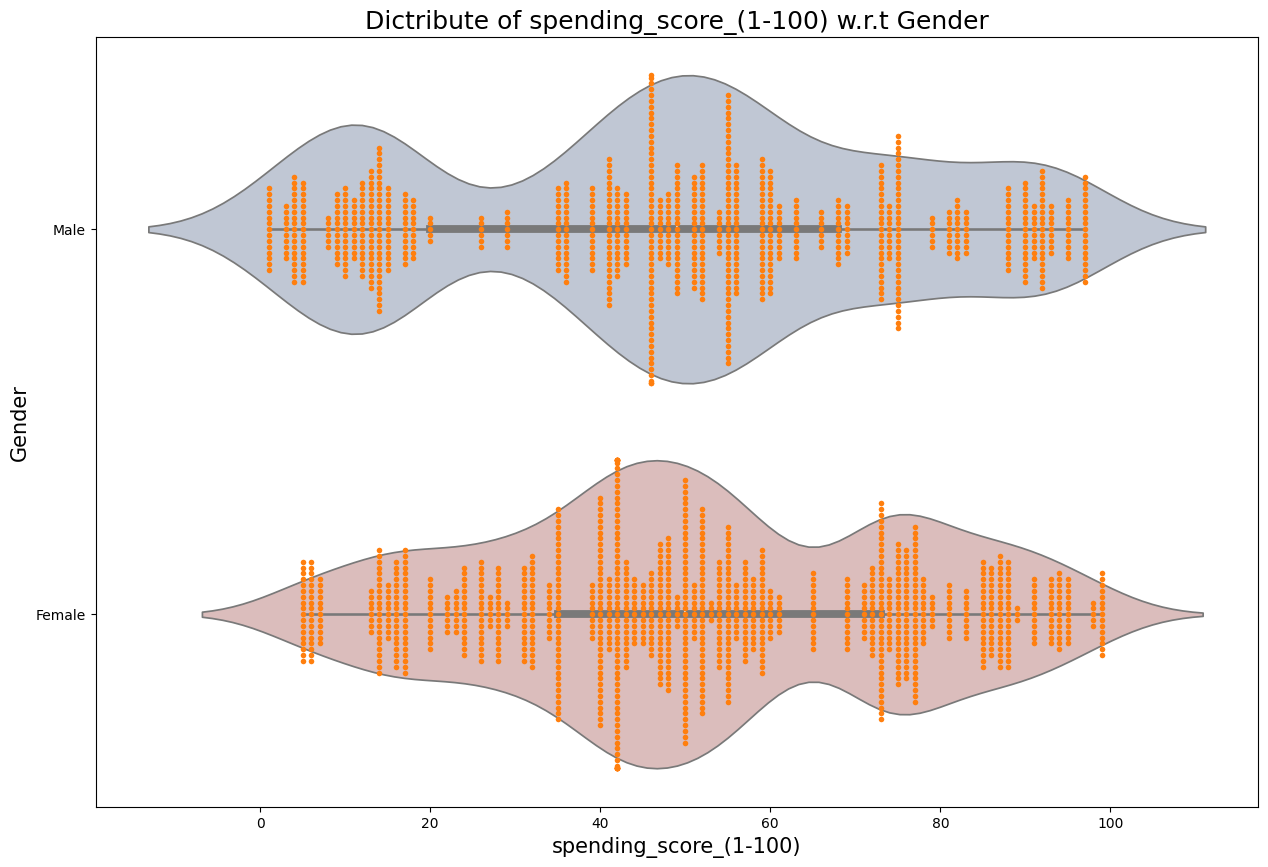

In [25]:
for i in ['age','annual_income_(k$)', 'spending_score_(1-100)']:
    plt.figure(figsize = (15,10))
    sns.violinplot(x = df[i] , y = 'gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = df[i] , y = 'gender' , data = df,s=4)
    plt.xlabel(f'{i}', size = 15)
    plt.ylabel('Gender', size = 15)
    plt.title(f'Dictribute of {i} w.r.t Gender', size = 18)
plt.show()



In [26]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [27]:
X = df[['age','annual_income_(k$)', 'spending_score_(1-100)']]

In [28]:
X

,age,annual_income_(k$),spending_score_(1-100)
0,67,62,59
1,35,93,90
2,48,60,49
3,37,20,13
4,66,63,50
...,...,...,...
1995,30,78,78
1996,56,79,35
1997,45,54,53
1998,19,65,50


In [31]:
n_clusters = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
inertia = []

for i in n_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


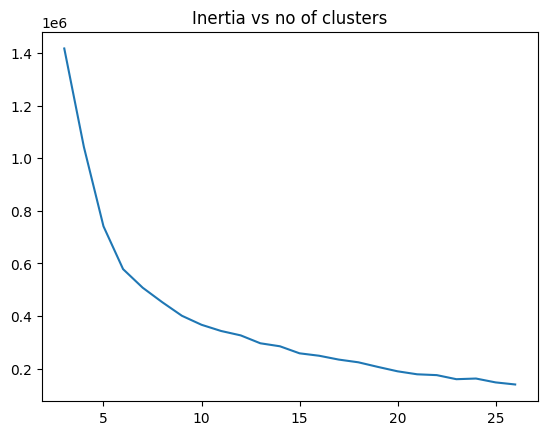

In [32]:
plt.plot(n_clusters, inertia)
plt.title('Inertia vs no of clusters')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=13,  algorithm = 'lloyd')
kmeans.fit(X)

KMeans(n_clusters=13)

In [36]:
labels, cluster_centers = kmeans.labels_ , kmeans.cluster_centers_

In [37]:
X['label'] = labels

/var/folders/58/b3q3qsxs23j0hmhkxlt9jql80000gn/T/ipykernel_50208/1091228239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = labels


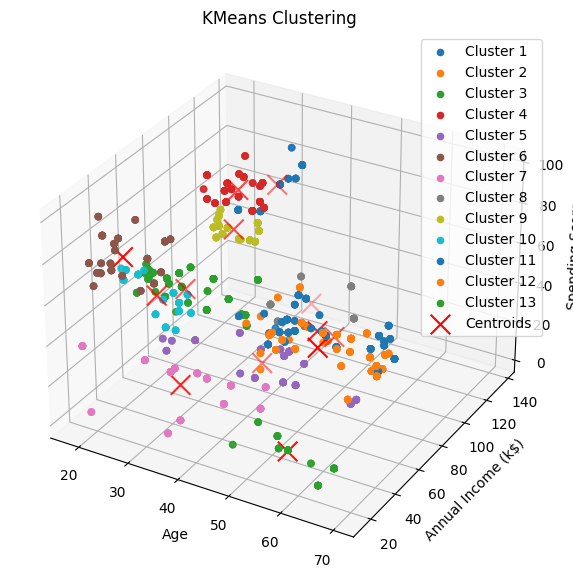

In [38]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each cluster and plot its data points
for i in range(13):
    x = X[X['label']==i]
    ax.scatter(x.age, x['annual_income_(k$)'], x['spending_score_(1-100)'],label=f'Cluster {i+1}')

# Plot centroids
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', s=200, c='red', label='Centroids')

ax.set_title('KMeans Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

In [43]:
from sklearn.decomposition import PCA

In [41]:
X = X[['age','annual_income_(k$)', 'spending_score_(1-100)']]
X

,age,annual_income_(k$),spending_score_(1-100)
0,67,62,59
1,35,93,90
2,48,60,49
3,37,20,13
4,66,63,50
...,...,...,...
1995,30,78,78
1996,56,79,35
1997,45,54,53
1998,19,65,50


In [44]:
pca = PCA(n_components=0.95)

In [45]:
pca_data = pca.fit_transform(X)

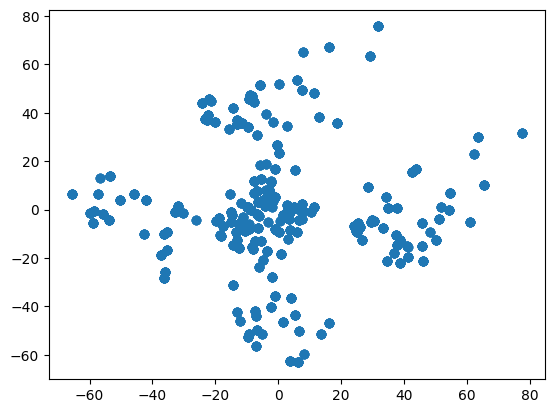

In [50]:
plt.scatter(pca_data[:,0], pca_data[:,1])

In [51]:
from sklearn.manifold import TSNE

In [52]:
tsne = TSNE(n_components=2)

In [53]:
tsne_data = tsne.fit_transform(X)

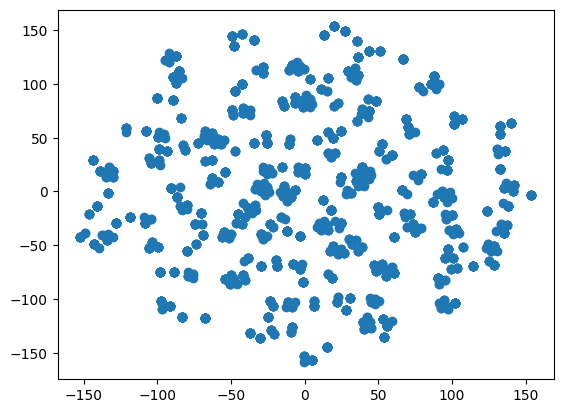

In [55]:
plt.scatter(tsne_data[:,0], tsne_data[:,1])